# GooglePlay Apps Analysis

Dataset yang dipakai adalah dataset googleplay yang diambil dari kaggle. Berikut adalah beberapa keterangan mengenai dataset tersebut.
1. App : Nama Aplikasi
2. Category : Kategori Aplikasi
3. Rating : Rating yang diberikan untuk tiap aplikasi
4. Reviews : Jumlah review yang diberikan tiap aplikasi
5. Size : Ukuran file aplikasi
6. Installs : Jumlah penginstal aplikasi
7. Type : Tipe aplikasi berbayar atau gratis
8. Content Rating : Segmentasi tiap aplikasi
9. Genres : Genre aplikasi
10. Last Updated : Terakhir kali aplikasi terupdate
11. Current Ver : versi terkini aplikasi
12. Android Ver : Versi aplikasi di android

### Import library dan load data

In [448]:
#Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
#Membaca datset googleplaystore
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Handling data duplikat

In [450]:
print('Jumlah data unique pada kolom App',df['App'].nunique())
print('Jumlah Keseluruhan raw pada kolom App',len(df['App']))

Jumlah data unique pada kolom App 9660
Jumlah Keseluruhan raw pada kolom App 10841


#### Pada kolom app, terdapat perbedaan pada jumlah data unik dan keselurhan datanya yang menandakan terdapat data duplikat pada kolom App. Untuk mengatasinya data duplikat ini akan dihapus dan diambil data yang terakhir masuk. 

In [451]:
#Drop data duplikat
df.drop_duplicates(subset='App', keep='first',inplace=True)
df['App'].nunique()

9660

#### Cek apakah masih ada selisih antara unique data dengan jemulah raw kolom App

In [452]:
print('Jumlah data unique pada kolom App',df['App'].nunique())
print('Jumlah Keseluruhan raw pada kolom App',len(df['App']))

Jumlah data unique pada kolom App 9660
Jumlah Keseluruhan raw pada kolom App 9660


### Handling Missing Value

In [453]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Terdapat missing vlue pada kolom Rating sebanyak 1463, kolom type dan COnten rating sebanyak 1, kolom current ver 8 data, android ver 3 data. Untuk kolom type, content rating, current ver dan android ver missing value akan dihapus dikarenakan data yang hilang hanya sedikit/tidak mencerminkan keselurhan data. Sementara untuk kolom Rating akan diisi dengan suatu nilai.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

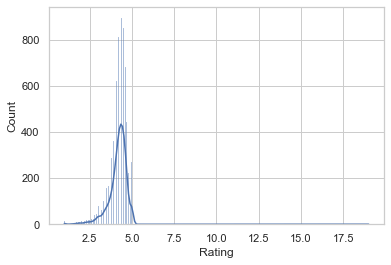

In [454]:
# Cek distribusi kolom rating
sns.histplot(df['Rating'],kde=True)

#### Jika dilihat dari distribusi kolom rating, distribusinya condong ke kanan sehingga missing value pada kolom ini bisa diisi dengna nilai mediannya

In [455]:
# Mengisi missing value kolom ratting dengan median kolom tersebut
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

#### Cek apakah masih ada missing value pada data

In [456]:
df = df.dropna()
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Handling tipe data yang tidak sesuai

In [457]:
#cek tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


#### Kolom price merupakan kolom harga tiap aplikasi. Kolom ini harusnya bertipe numeric. Tetapi pada data kolom tersebut bertipe object sehingga perlu dikonversikan terlebih dahulu.

In [458]:
### Cek unique data pada kolom price
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

#### Untuk merubah kolom price menjadi numeric, karakter $ harus dihilangkan terlebih dahulu.

In [459]:
# Menghilangkan karakter $ 
df['Price'] = df['Price'].str.replace(r'^(\$)', '', regex=True)

# Konversi tipe data menjadi float
df['Price'] = df['Price'].astype(float)
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#### Kolom reviews juga merupakan kolom dengan tipe data yang tidak sesuai karena seharusnya tipe data pada kolom ini adalah numeric. Sehingga perlu dikonversikan terlebih dahulu.

In [460]:
# Konversi tipe data menjadi integer
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].nunique()

5328

#### Kolom Install juga merupakan kolom dengan tipe data yang tidak sesuai karena seharusnya tipe data pada kolom ini adalah numeric. Sehingga perlu dikonversikan terlebih dahulu.

In [461]:
# Cek unique data pada kolom price
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [462]:
# Menghilangkan karakter + dan ,
df['Installs'] = df['Installs'].str.replace(r'(\+|\,)', '', regex=True)
# Konversi tipe data menjadi integer
df['Installs'] = df['Installs'].astype(int)
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int32  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int32  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 979.9+ KB


### TOP Kategori berdasarkan kolom Rating

In [464]:
# Membuat pivot tabel berdasarkan kolom kategori
top_cat = pd.pivot_table(df,index=['Category'],
                    aggfunc ={
                    'Rating':'mean',
                    'Price' :'mean',
                    'Reviews' : 'sum',
                    'Installs' :'sum'
                    }).reset_index()
top_cat

,Category,Installs,Price,Rating,Reviews
0,ART_AND_DESIGN,1.143331e+08,0.094762,4.373016,1419148
1,AUTO_AND_VEHICLES,5.313021e+07,0.158471,4.205882,1163666
2,BEAUTY,2.719705e+07,0.000000,4.283019,396240
3,BOOKS_AND_REFERENCE,1.665969e+09,0.541946,4.334389,16721306
4,BUSINESS,6.971649e+08,0.417357,4.173810,9890245
5,COMICS,4.498115e+07,0.000000,4.185714,2342071
6,COMMUNICATION,1.103828e+10,0.263937,4.154921,285811368
7,DATING,1.409261e+08,0.160468,4.041520,3623544
8,EDUCATION,3.529520e+08,0.150924,4.363866,13364148
9,ENTERTAINMENT,2.113660e+09,0.078235,4.135294,34762650


In [465]:
# Menurutkan top 5 kategori berdasarkan ratingnya
top_cat = top_cat.sort_values('Rating',ascending=False).head(5)
top_cat

,Category,Installs,Price,Rating,Reviews
10,EVENTS,1.597316e+07,1.718594,4.395313,161018
0,ART_AND_DESIGN,1.143331e+08,0.094762,4.373016,1419148
8,EDUCATION,3.529520e+08,0.150924,4.363866,13364148
3,BOOKS_AND_REFERENCE,1.665969e+09,0.541946,4.334389,16721306
23,PERSONALIZATION,1.532484e+09,0.398369,4.324866,53542661


In [466]:
cat = top_cat['Category'].unique().tolist()
cat

['EVENTS',
 'ART_AND_DESIGN',
 'EDUCATION',
 'BOOKS_AND_REFERENCE',
 'PERSONALIZATION']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


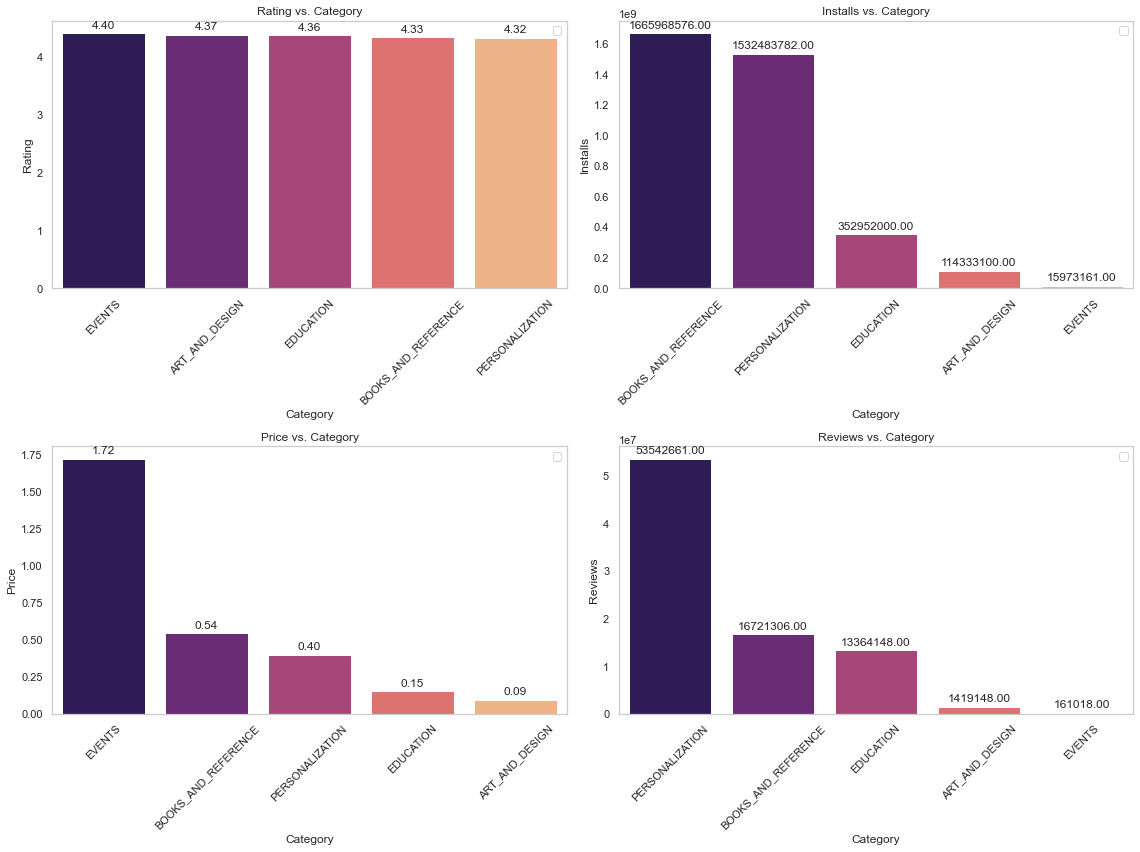

In [467]:
# Visualisasi top 5 kategori berdasarkan ratingnya
plt.rcParams['axes.labelsize'] = 12

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Rating
sns.barplot(x='Category', y='Rating', data=top_cat.sort_values('Rating', ascending=False).head(5), palette='magma',  ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_title("Rating vs. Category")
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].grid(axis='y', linestyle='--')
axes[0, 0].legend(loc='upper right')

# Add label values for Plot 1
for p in axes[0, 0].patches:
    height = p.get_height()
    axes[0, 0].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 2: Installs
sns.barplot(x='Category', y='Installs', data=top_cat.sort_values('Installs', ascending=False), palette='magma', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_title("Installs vs. Category")
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Installs')
axes[0, 1].grid(axis='y', linestyle='--')
axes[0, 1].legend(loc='upper right')

# Add label values for Plot 2
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 3: Price
sns.barplot(x='Category', y='Price', data=top_cat.sort_values('Price', ascending=False), palette='magma', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_title("Price vs. Category")
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Price')
axes[1, 0].grid(axis='y', linestyle='--')
axes[1, 0].legend(loc='upper right')

# Add label values for Plot 3
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 4: Reviews
sns.barplot(x='Category', y='Reviews', data=top_cat.sort_values('Reviews', ascending=False), palette='magma', ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_title("Reviews vs. Category")
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Reviews')
axes[1, 1].grid(axis='y', linestyle='--')
axes[1, 1].legend(loc='upper right')

# Add label values for Plot 4
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()

plt.show()


#### 5 Kategori aplikasi dengan rating tertinggi adalah events, art and design, education, books and refference serta personalization dengan nilai rata-rata rating diatas 4.
#### Dari ke 5 kategori ini , yang memiliki jumlah penginstalls terbanyak adalah aplikasi dengan kategori books and refference. Sementara jumlah  penginstal paling sedikit dimiliki oleh aplikasi dengna kategori events.
#### Jika dilihat dari harga-harga rata-rata tiap aplikasinya, kategori event memiliki rata-rata harga yang paling tinggi dengan nilai sebesar 1.72 dolar. Hal inilah yang mungkin membuat jumlah penginstal aplikasi kategori events sangat kecil dibanding dengan top kategori lainnya.

#### Sementara untuk menganalisis bagaimana review tiap kategori kita memerlukan data baru bernama googleplaystore_user_reviews. Data ini berisi bagaimana review user beserta sentimennya.

In [468]:
df.to_csv('Googleplay_clean.csv')

In [469]:
#Load data user review
df1 = pd.read_csv('googleplaystore_user_reviews.csv')
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [470]:
# Membuat pivot tabel berdasarkan kolom App dari data df1
pv = pd.pivot_table(df1,index=['App','Sentiment'],
                    aggfunc ={
                    'Sentiment_Polarity':'count'
                    }).reset_index()
pv = pv.rename(columns={'Sentiment_Polarity':'Jumlah'})
pv

,App,Sentiment,Jumlah
0,10 Best Foods for You,Negative,10
1,10 Best Foods for You,Neutral,22
2,10 Best Foods for You,Positive,162
3,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Negative,1
4,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Neutral,8
...,...,...,...
2371,Hotwire Hotel & Car Rental App,Neutral,11
2372,Hotwire Hotel & Car Rental App,Positive,16
2373,Housing-Real Estate & Property,Negative,10
2374,Housing-Real Estate & Property,Neutral,3


In [471]:
# Mengambil data sentimen dan jumlah dari pivot_df1 kemudian menggabungkannya ke data utama dengan key valuekolom App
df_review = pd.merge(df,pv, on ='App', how='left')
df_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Jumlah
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Negative,14.0
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Neutral,4.0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Positive,26.0
4,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN


In [472]:
df_review.to_csv('Googleplay_revie_clean.csv')

In [473]:
# Membuat pivot table berdasarkan kolom kategori dan sentimennya
top_cat_sentimen = pd.pivot_table(df_review,index=['Category','Sentiment'],
                   aggfunc={
                       'Jumlah':'sum'
                   }).reset_index()

#Mengambil unique value kolom category pada data top_cat
cat = top_cat['Category'].unique().tolist()
# Melihat sentiment dengan kategori top_cat
top_cat_sentimen = top_cat_sentimen[top_cat_sentimen['Category'].isin(cat)]
top_cat_sentimen

,Category,Sentiment,Jumlah
0,ART_AND_DESIGN,Negative,61.0
1,ART_AND_DESIGN,Neutral,62.0
2,ART_AND_DESIGN,Positive,259.0
9,BOOKS_AND_REFERENCE,Negative,95.0
10,BOOKS_AND_REFERENCE,Neutral,108.0
11,BOOKS_AND_REFERENCE,Positive,448.0
24,EDUCATION,Negative,102.0
25,EDUCATION,Neutral,90.0
26,EDUCATION,Positive,655.0
30,EVENTS,Negative,16.0


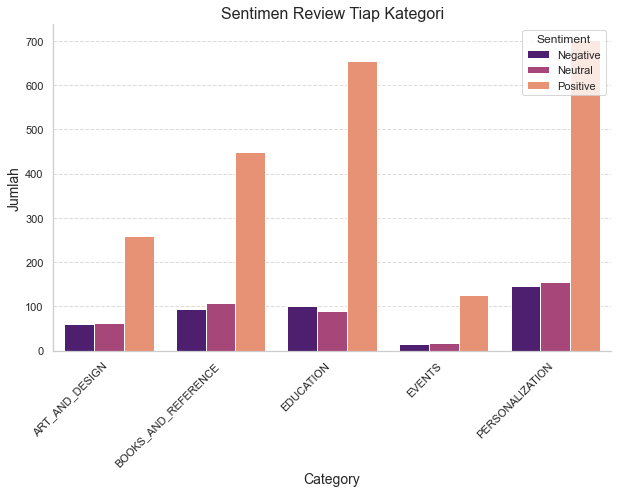

In [474]:
# Set the style for the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Category', y='Jumlah', data=top_cat_sentimen, hue='Sentiment', palette='magma')

# Add labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Sentimen Review Tiap Kategori', fontsize=16)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Adjust the legend location (optional)
plt.legend(loc='upper right', title='Sentiment')

# Add grid lines (optional)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for cleaner appearance (optional)
sns.despine()

# Show the plot
plt.show()

#### Dari visualisasi diatas dapat dilihat bahwa tiap kategori memiliki review positif yang nilainya sangat tinggi dibanding dengan sentimen negatif maupun netralnya. Hal ini menandakan user puas dengan aplikasi-aplikasi pada top kategori ini.

### Analisis kolom Type

In [475]:
# Membuat pivot table berdasarkan kolom type
top_type = pd.pivot_table(df,index=['Type'],
                    aggfunc ={
                    'App' : 'count',
                    'Rating':'mean',
                    'Price' :'mean',
                    'Reviews' : 'sum',
                    'Installs' :'sum'
                    }).reset_index()
#Mengganti nama kolom App menjadi Jumlah
top_type = top_type.rename(columns={'App':'Jumlah'})
top_type

,Type,Jumlah,Installs,Price,Rating,Reviews
0,Free,8895,7.506405e+10,0.000000,4.186082,2085447108
1,Paid,753,5.731387e+07,14.096494,4.267862,6595605


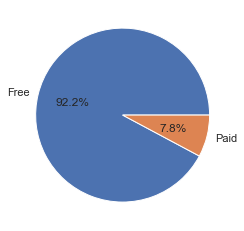

In [476]:
plt.pie(data = top_type,x='Jumlah', labels='Type', autopct='%1.1f%%')
plt.show()

#### Mayoritas aplikasi merupakan aplikasi bertipe free atau gratis dengan presentase sebanyak 92.2%.

In [477]:
# Membuat pivot table berdasarkan kolom type
top_type = pd.pivot_table(df_review,index=['Type','Sentiment'],
                    aggfunc ={
                    'Jumlah' : 'sum'
                    }).reset_index()

top_type

,Type,Sentiment,Jumlah
0,Free,Negative,7942.0
1,Free,Neutral,4828.0
2,Free,Positive,22748.0
3,Paid,Negative,63.0
4,Paid,Neutral,28.0
5,Paid,Positive,325.0


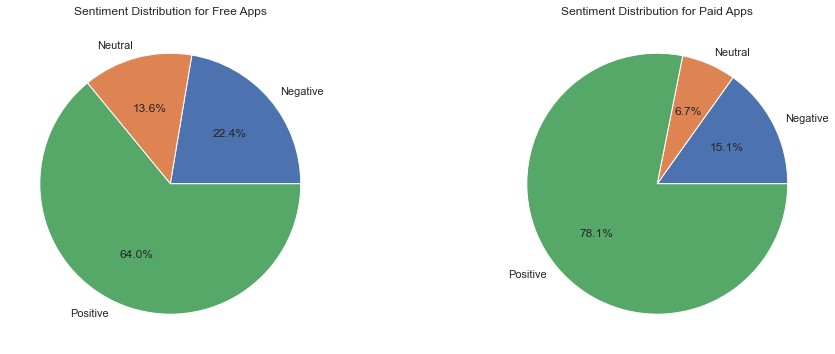

In [478]:
free = top_type[top_type['Type']=='Free']
paid = top_type[top_type['Type']=='Paid']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the pie chart for 'Free' apps
free_sentiment_counts = free['Jumlah'].values
free_sentiment_labels = free['Sentiment'].values
axes[0].pie(free_sentiment_counts, labels=free_sentiment_labels, autopct='%1.1f%%')
axes[0].set_title('Sentiment Distribution for Free Apps')

# Plot the pie chart for 'Paid' apps
paid_sentiment_counts = paid['Jumlah'].values
paid_sentiment_labels = paid['Sentiment'].values
axes[1].pie(paid_sentiment_counts, labels=paid_sentiment_labels, autopct='%1.1f%%')
axes[1].set_title('Sentiment Distribution for Paid Apps')

# Show the plot
plt.show()

#### Aplikasi dengan tipe free maupun paid memiliki review sentiment positif yang cukup besar. Untuk aplikasi dengan tipe free memiliki presentase review positif mencapai 64% sementara untuk aplikasi berbayar (paid) memliki presentase review positif mencapai 78%.
#### Tetapi, review negatif untuk tiap tipenya juga bisa dikatakan besar, dengan presentase untuk tipe free mencaapai 22.4% dan tipe berbayar mencapai 15.1%. 
#### Presentase review negatif yang cukup besar ini perlu dijadikan catatan agar kedepannya bisa lebih diperbaiki agar review negatif user menurun.

### Analisis kolom content rating

In [479]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [480]:
#Membuat pivot table berdasrkan kolom content rating dan type, diurutkan berdasrkan jumlah penginstal terbanyak
Top_content = pd.pivot_table(df,index=['Content Rating'],
                    aggfunc ={
                    'Rating':'mean',
                    'Price' :'mean',
                    'Reviews' : 'sum',
                    'Installs' :'sum'
                    }).reset_index().sort_values('Installs',ascending=False)
Top_content

,Content Rating,Installs,Price,Rating,Reviews
1,Everyone,5.217778e+10,1.231035,4.188091,1300301645
4,Teen,1.648728e+10,0.633475,4.234556,503292211
2,Everyone 10+,4.016272e+09,0.435202,4.229595,201328121
3,Mature 17+,2.437987e+09,0.259847,4.138168,87038201
0,Adults only 18+,2.000000e+06,0.000000,4.300000,81348
5,Unrated,5.050000e+04,0.000000,4.200000,1187


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


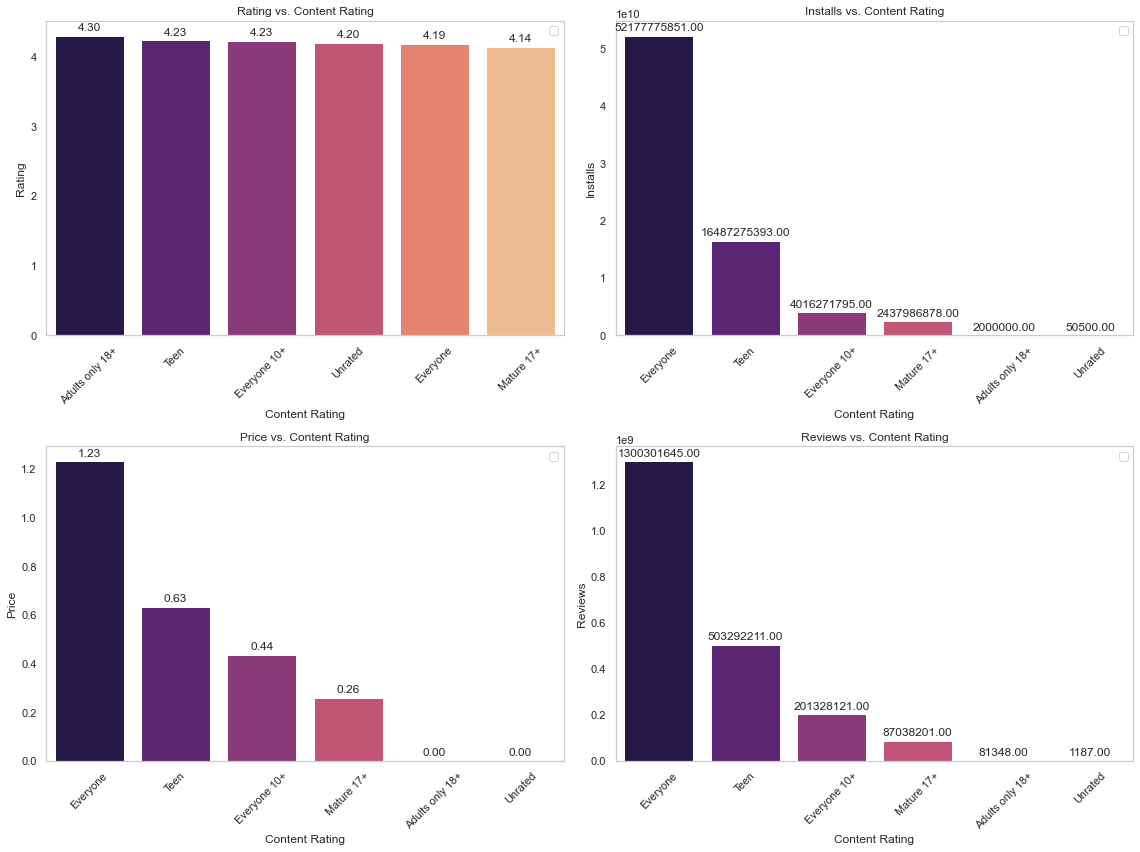

In [481]:
# visualisasi untuk kolom content rating dengan rating, instal, price,reviews
plt.rcParams['axes.labelsize'] = 12

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Rating
sns.barplot(x='Content Rating', y='Rating', data=Top_content.sort_values('Rating', ascending=False), palette='magma', ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_title("Rating vs. Content Rating")
axes[0, 0].set_xlabel('Content Rating')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].grid(axis='y', linestyle='--')
axes[0, 0].legend(loc='upper right')

# Add label values for Plot 1
for p in axes[0, 0].patches:
    height = p.get_height()
    axes[0, 0].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 2: Installs
sns.barplot(x='Content Rating', y='Installs', data=Top_content.sort_values('Installs', ascending=False), palette='magma', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_title("Installs vs. Content Rating")
axes[0, 1].set_xlabel('Content Rating')
axes[0, 1].set_ylabel('Installs')
axes[0, 1].grid(axis='y', linestyle='--')
axes[0, 1].legend(loc='upper right')

# Add label values for Plot 2
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 3: Price
sns.barplot(x='Content Rating', y='Price', data=Top_content.sort_values('Price', ascending=False), palette='magma', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_title("Price vs. Content Rating")
axes[1, 0].set_xlabel('Content Rating')
axes[1, 0].set_ylabel('Price')
axes[1, 0].grid(axis='y', linestyle='--')
axes[1, 0].legend(loc='upper right')

# Add label values for Plot 3
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Plot 4: Reviews
sns.barplot(x='Content Rating', y='Reviews', data=Top_content.sort_values('Reviews', ascending=False), palette='magma', ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_title("Reviews vs. Content Rating")
axes[1, 1].set_xlabel('Content Rating')
axes[1, 1].set_ylabel('Reviews')
axes[1, 1].grid(axis='y', linestyle='--')
axes[1, 1].legend(loc='upper right')

# Add label values for Plot 4
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()

plt.show()


#### Seluruh content rating aplikasi memiliki nilai rata-rata rating yang tinggi dengan nilai rata-rata rating diatas 4.
#### Dari seluruh content ratting aplikasi ini , yang memiliki jumlah penginstalls terbanyak adalah aplikasi dengan content rating  everyone. Sementara jumlah  penginstal paling sedikit dimiliki oleh aplikasi dengan content rating unrated.
#### Jika dilihat dari harga-harga rata-rata tiap aplikasinya, content rating Everyone memiliki rata-rata harga yang paling tinggi dengan nilai sebesar 1.23 dolar. Nilai yang tinggi ini tidak mempengaruhi jumlah penginstal aplikasi dengan content rating everyone

## Conclusion
Tiap aplikasi sudah memiliki rata-rata rating yang tinggi yaitu diatas 4 dan juga rata-rata jumlah review positif yang tinggi. hal ini sudah cukup bagus, Tetapi jika dilihat dari review negaitfnya, jumlah review negatifnya cukup meanrik perhatian. Walaupun tidak sebanyak review positif, review negatif yang diatas 15% sudah bisa dibilang cukup besar. Sehingga perlu dilakukan perbaikan untuk mengurangi review negatif yang dimiliki tiap aplikasi.